<a href="https://colab.research.google.com/github/deepika0211/Final_year_project/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [2]:
DATASET_PATH = "/content/drive/MyDrive/Final_year_project/diseases_Data"

IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 15


In [5]:
!git clone https://github.com/deepika0211/Final_year_project

Cloning into 'Final_year_project'...
remote: Enumerating objects: 4978, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 4978 (delta 1), reused 0 (delta 0), pack-reused 4971 (from 1)
Receiving objects: 100% (4978/4978), 231.88 MiB | 27.62 MiB/s, done.
Resolving deltas: 100% (37/37), done.
Updating files: 100% (6098/6098), done.


In [6]:
DATASET_PATH = "/content/Final_year_project/diseases_Data/raw_data"


In [7]:
import os
print(os.listdir(DATASET_PATH))


['Optic Glioma', 'Tuberous Sclerosis', 'Neurofibromatosis Type 1 (NF1)', 'Moyamoya Disease with Intraventricular Hemorrhage', 'normal']


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2456 images belonging to 5 classes.
Found 610 images belonging to 5 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.3805 - loss: 1.5578 - val_accuracy: 0.7393 - val_loss: 0.7884
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 142s 923ms/step - accuracy: 0.6521 - loss: 0.8663 - val_accuracy: 0.8213 - val_loss: 0.5693
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 143s 928ms/step - accuracy: 0.7715 - loss: 0.6372 - val_accuracy: 0.8721 - val_loss: 0.4505
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 144s 934ms/step - accuracy: 0.8254 - loss: 0.4883 - val_accuracy: 0.8984 - val_loss: 0.3673
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 153s 995ms/step - accuracy: 0.8594 - loss: 0.4137 - val_accuracy: 0.9148 - val_loss: 0.3090
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 145s 940ms/step - accuracy: 0.8908 - loss: 0.3354 - val_accuracy: 0.9246 - val_loss: 0.2737
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 199s 923ms/step - accuracy: 0.9044 - loss: 0.3061 - val_accuracy: 0.9295 - val_loss: 0.2423
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 138s 895ms/step - accuracy: 0.9171 - lo

In [13]:
loss, acc = model.evaluate(val_data)
print("Final Validation Accuracy:", acc)


39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 740ms/step - accuracy: 0.9636 - loss: 0.1201
Final Validation Accuracy: 0.9622950553894043


In [14]:
model.save("brain_disease_model.h5")


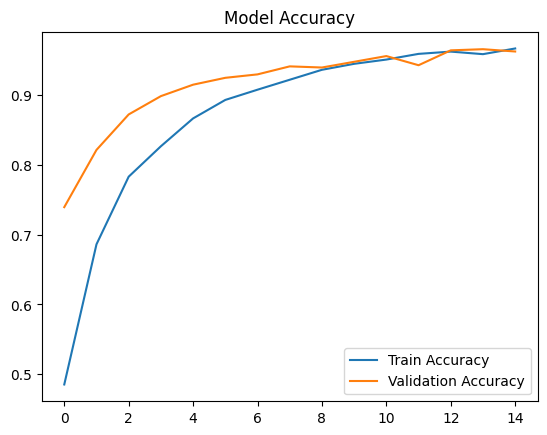

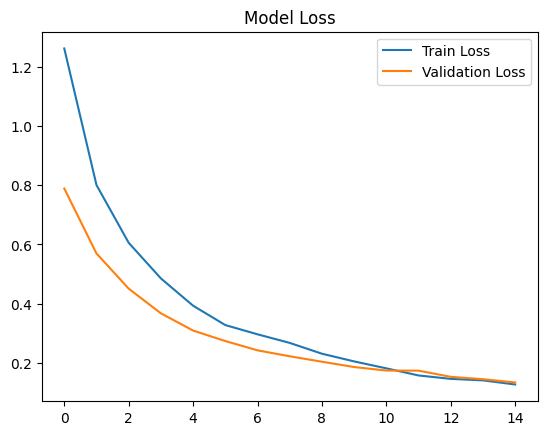

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


39/39 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step


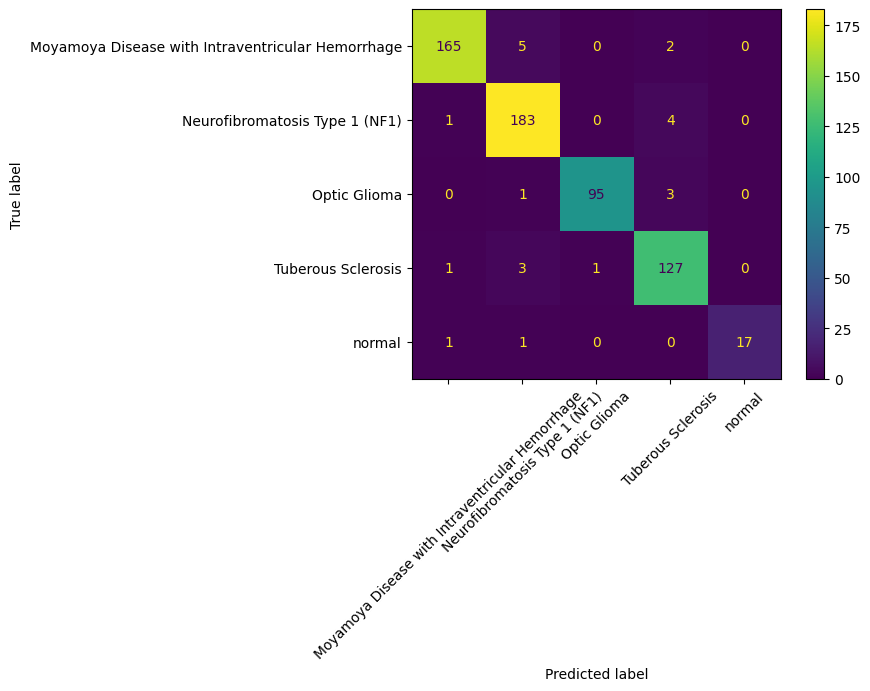

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = val_data.classes
y_pred = model.predict(val_data)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=val_data.class_indices.keys())
disp.plot(xticks_rotation=45)


In [17]:
class_names = list(train_data.class_indices.keys())
print(class_names)


['Moyamoya Disease with Intraventricular Hemorrhage', 'Neurofibromatosis Type 1 (NF1)', 'Optic Glioma', 'Tuberous Sclerosis', 'normal']


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

IMG_SIZE = (224, 224)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [19]:
def predict_disease(img_path):
    img = preprocess_image(img_path)
    preds = model.predict(img)[0]

    print("\nOutput\n")
    for cls, prob in zip(class_names, preds):
        print(f"{cls}: {prob*100:.2f}%")

    max_index = np.argmax(preds)
    print("\nFinal Predicted Disease:", class_names[max_index])
    print(f"Confidence: {preds[max_index]*100:.2f}%")


In [26]:
import os

optic_path = "/content/Final_year_project/diseases_Data/raw_data/Optic Glioma"
print(os.listdir(optic_path)[:10])


['real Optic Glioma', 'synthetic Optic Glioma']


In [27]:
import os
import shutil

base = "/content/Final_year_project/diseases_Data/raw_data/Optic Glioma"
real_folder = os.path.join(base, "real Optic Glioma")

for img in os.listdir(real_folder):
    shutil.move(
        os.path.join(real_folder, img),
        os.path.join(base, img)
    )

print("✅ Real images moved to Optic Glioma folder")


✅ Real images moved to Optic Glioma folder


In [28]:
shutil.rmtree(os.path.join(base, "synthetic Optic Glioma"))


In [29]:
import random, os

folder = "/content/Final_year_project/diseases_Data/raw_data/Optic Glioma"
img = random.choice(os.listdir(folder))

test_image = os.path.join(folder, img)
predict_disease(test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Output

Moyamoya Disease with Intraventricular Hemorrhage: 0.05%
Neurofibromatosis Type 1 (NF1): 0.14%
Optic Glioma: 99.67%
Tuberous Sclerosis: 0.12%
normal: 0.02%

Final Predicted Disease: Optic Glioma
Confidence: 99.67%


In [30]:
from google.colab import files

uploaded = files.upload()


Saving download (6).jpg to download (6).jpg


In [31]:
import os

uploaded_filename = list(uploaded.keys())[0]
image_path = os.path.join("/content", uploaded_filename)

print("Uploaded image path:", image_path)


Uploaded image path: /content/download (6).jpg


In [32]:
predict_disease(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

Output

Moyamoya Disease with Intraventricular Hemorrhage: 0.08%
Neurofibromatosis Type 1 (NF1): 3.10%
Optic Glioma: 0.06%
Tuberous Sclerosis: 61.31%
normal: 35.46%

Final Predicted Disease: Tuberous Sclerosis
Confidence: 61.31%


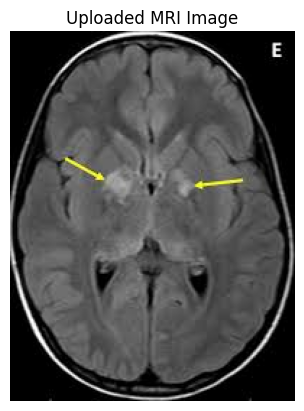

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")
plt.title("Uploaded MRI Image")
plt.show()


In [35]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)


In [36]:
final_metrics = {
    "precision": report["macro avg"]["precision"],
    "recall": report["macro avg"]["recall"],
    "f1-score": report["macro avg"]["f1-score"],
    "support": report["macro avg"]["support"]
}

final_metrics


{'precision': 0.9707472496770728,
 'recall': 0.9498321189445958,
 'f1-score': 0.9595565538774459,
 'support': 610.0}

In [37]:
from google.colab import files

uploaded = files.upload()


Saving download (7).jpg to download (7).jpg


In [38]:
import os

image_name = list(uploaded.keys())[0]
image_path = os.path.join("/content", image_name)

print("Uploaded image:", image_path)


Uploaded image: /content/download (7).jpg


In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image

IMG_SIZE = (224, 224)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [40]:
def predict_disease(img_path):
    img = preprocess_image(img_path)
    preds = model.predict(img)[0]

    print("\nOutput\n")
    for cls, prob in zip(class_names, preds):
        print(f"{cls}: {prob*100:.2f}%")

    predicted_index = np.argmax(preds)
    print("\nFinal Predicted Disease:", class_names[predicted_index])
    print(f"Confidence: {preds[predicted_index]*100:.2f}%")


In [41]:
predict_disease(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step

Output

Moyamoya Disease with Intraventricular Hemorrhage: 18.69%
Neurofibromatosis Type 1 (NF1): 11.43%
Optic Glioma: 10.38%
Tuberous Sclerosis: 47.88%
normal: 11.62%

Final Predicted Disease: Tuberous Sclerosis
Confidence: 47.88%
